# Classification Intuition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification
import seaborn as sns
from mpl_toolkits import mplot3d
import tensorflow as tf

(500, 2) (500,)


<AxesSubplot:xlabel='x1', ylabel='x2'>

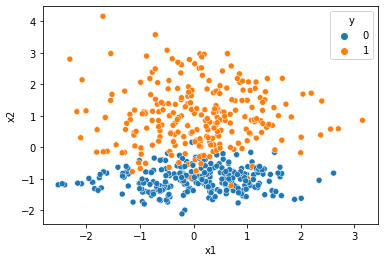

In [129]:
X, y = make_classification(n_samples=500, n_features=2, random_state=30, \
                           n_informative=1, n_classes=2, n_clusters_per_class=1, \
                           n_repeated=0, n_redundant=0)

print(X.shape, y.shape)

df = pd.DataFrame(X,columns=['x1','x2'])
df['y'] = y

sns.scatterplot(data=df,x='x1',y='x2',hue='y')

### Logistic Regression with Neural network (sigmoid)

<AxesSubplot:xlabel='x1', ylabel='x2'>

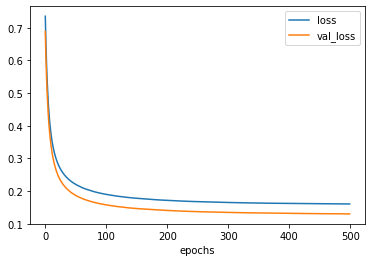

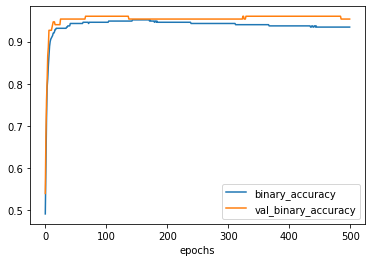

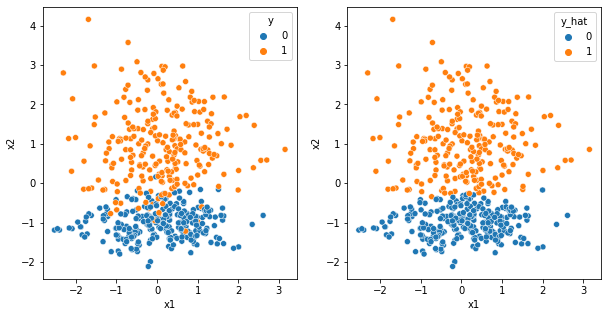

In [130]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.09),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    df.y,
    epochs=500,
    batch_size=100,
    verbose=0,
    validation_split = 0.3)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['binary_accuracy','val_binary_accuracy'])

y_hat = model.predict(df[['x1','x2']].values)
df['y_hat'] = np.array(y_hat>0.5,dtype='int')

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])



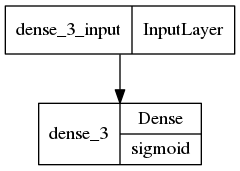

In [131]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

<AxesSubplot:xlabel='x1', ylabel='x2'>

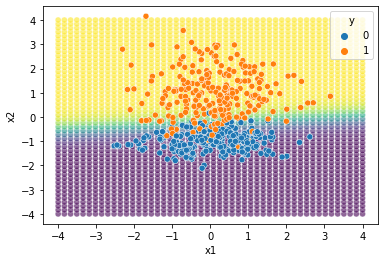

In [132]:
a1 = np.linspace(-4,4)
a2 = np.linspace(-4,4)
all_ins = np.array(np.meshgrid(a1, a2)).T.reshape(-1, 2)

areas = model.predict(all_ins)

sns.scatterplot(x=all_ins[...,0], y=all_ins[...,1], hue=areas[...,0], alpha=0.6, palette='viridis',legend=False)
sns.scatterplot(data = df, x = 'x1', y='x2', hue='y')

### 2 sigmoid layers

<AxesSubplot:xlabel='x1', ylabel='x2'>

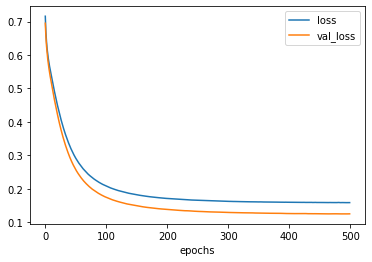

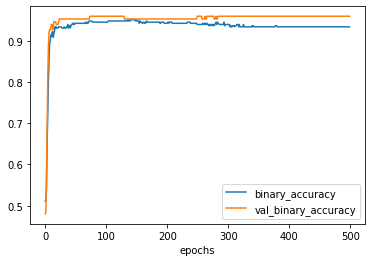

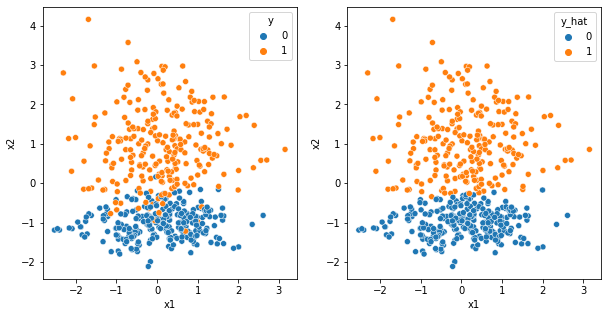

In [133]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.09),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    df.y,
    epochs=500,
    batch_size=100,
    verbose=0,
    validation_split = 0.3)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['binary_accuracy','val_binary_accuracy'])

y_hat = model.predict(df[['x1','x2']].values)
df['y_hat'] = np.array(y_hat>0.5,dtype='int')

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])

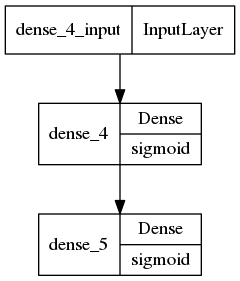

In [134]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

<AxesSubplot:xlabel='x1', ylabel='x2'>

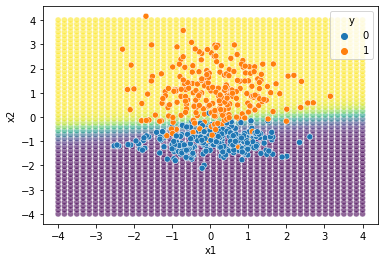

In [135]:
a1 = np.linspace(-4,4)
a2 = np.linspace(-4,4)
all_ins = np.array(np.meshgrid(a1, a2)).T.reshape(-1, 2)

areas = model.predict(all_ins)

sns.scatterplot(x=all_ins[...,0], y=all_ins[...,1], hue=areas[...,0], alpha=0.6, palette='viridis',legend=False)
sns.scatterplot(data = df, x = 'x1', y='x2', hue='y')

### 3 sigmoid layers

<AxesSubplot:xlabel='x1', ylabel='x2'>

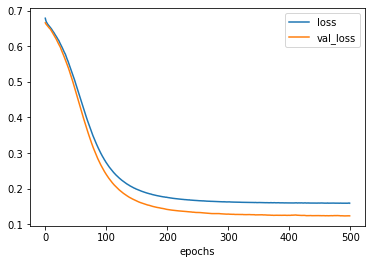

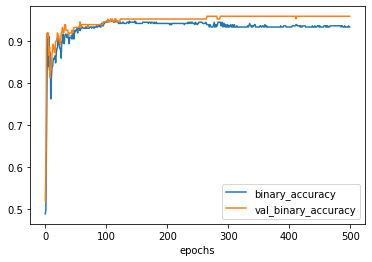

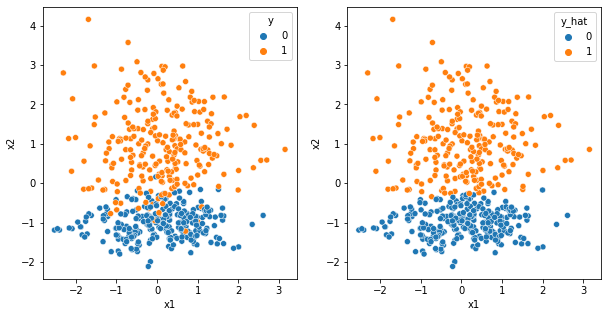

In [136]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.09),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=tf.keras.metrics.BinaryAccuracy()
)

history = model.fit(
    df[['x1','x2']],
    df.y,
    epochs=500,
    batch_size=100,
    verbose=0,
    validation_split = 0.3)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'],)
history_metrics.plot(x='epochs',y=['binary_accuracy','val_binary_accuracy'])

y_hat = model.predict(df[['x1','x2']].values)
df['y_hat'] = np.array(y_hat>0.5,dtype='int')

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',ax=ax[0])
sns.scatterplot(data=df,x='x1',y='x2',hue='y_hat', ax=ax[1])

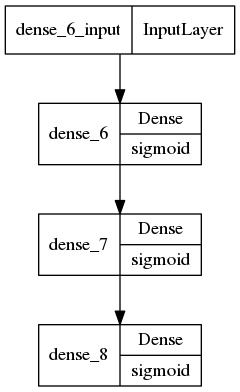

In [137]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

<AxesSubplot:xlabel='x1', ylabel='x2'>

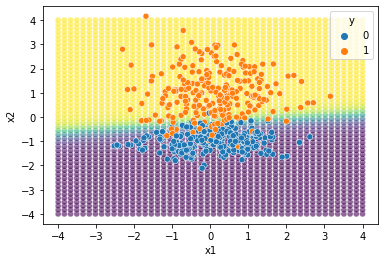

In [138]:
a1 = np.linspace(-4,4)
a2 = np.linspace(-4,4)
all_ins = np.array(np.meshgrid(a1, a2)).T.reshape(-1, 2)

areas = model.predict(all_ins)

sns.scatterplot(x=all_ins[...,0], y=all_ins[...,1], hue=areas[...,0], alpha=0.6, palette='viridis',legend=False)
sns.scatterplot(data = df, x = 'x1', y='x2', hue='y')

### Something with Softmax

for using softmax i'll have to one hot encode the target.. so in the final layers we can have two outputs

In [143]:
from sklearn.preprocessing import OneHotEncoder

In [165]:
ohe = OneHotEncoder()
ohe.fit(df[['y']].values)

y_ohe = ohe.transform(df[['y']].values).toarray()